## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [1]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = 2*(((x - x.min()) / (x.max() - x.min()))-0.5)
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable para

In [10]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [11]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [12]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 11s 225us/step - loss: 1.7036 - acc: 0.3953 - val_loss: 1.5541 - val_acc: 0.4464
Epoch 2/100
50000/50000 [==============================] - 10s 202us/step - loss: 1.4701 - acc: 0.4813 - val_loss: 1.4503 - val_acc: 0.4831
Epoch 3/100
50000/50000 [==============================] - 10s 201us/step - loss: 1.3543 - acc: 0.5239 - val_loss: 1.4362 - val_acc: 0.4897
Epoch 4/100
50000/50000 [==============================] - 10s 201us/step - loss: 1.2607 - acc: 0.5557 - val_loss: 1.4171 - val_acc: 0.5123
Epoch 5/100
50000/50000 [==============================] - 11s 212us/step - loss: 1.1801 - acc: 0.5843 - val_loss: 1.3979 - val_acc: 0.5186
Epoch 6/100
50000/50000 [==============================] - 11s 216us/step - loss: 1.0944 - acc: 0.6127 - val_loss: 1.3968 - val_acc: 0.5259
Epoch 7/100
50000/50000 [==============================] - 11s

Epoch 57/100
50000/50000 [==============================] - 17s 342us/step - loss: 0.0859 - acc: 0.9712 - val_loss: 3.8030 - val_acc: 0.5265
Epoch 58/100
50000/50000 [==============================] - 20s 399us/step - loss: 0.0724 - acc: 0.9759 - val_loss: 3.9144 - val_acc: 0.5272
Epoch 59/100
50000/50000 [==============================] - 17s 341us/step - loss: 0.1027 - acc: 0.9667 - val_loss: 3.8884 - val_acc: 0.5242
Epoch 60/100
50000/50000 [==============================] - 18s 358us/step - loss: 0.1323 - acc: 0.9565 - val_loss: 3.8912 - val_acc: 0.5191
Epoch 61/100
50000/50000 [==============================] - 18s 357us/step - loss: 0.1015 - acc: 0.9677 - val_loss: 3.8310 - val_acc: 0.5259
Epoch 62/100
50000/50000 [==============================] - 17s 342us/step - loss: 0.0802 - acc: 0.9731 - val_loss: 3.9914 - val_acc: 0.5228
Epoch 63/100
50000/50000 [==============================] - 18s 353us/step - loss: 0.0870 - acc: 0.9715 - val_loss: 3.9926 - val_acc: 0.5256
Epoch 64/100


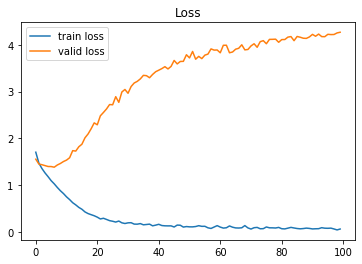

In [14]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

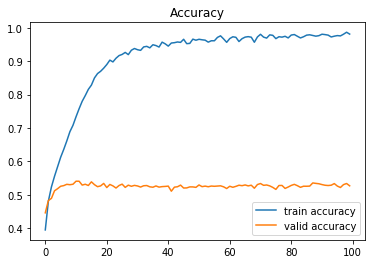

In [15]:
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()